In [214]:
import os
import subprocess
import numpy as np
import matplotlib.pyplot as plt
import utils as ut

system_name = 'kite3d_turbo'
run_name = 'norail_final2'
source_dir = '../data/'+system_name+'/'+run_name+'/'
data_dir = '../data/'+system_name+'/'+run_name+'_eval/'
plot_dir = '../plots/'+system_name+'/'+run_name+'/'

## Evaluate

In [215]:
# READING THE ENVIRONMENTAL PARAMETERS
env_params = ut.read_params(source_dir+'param_env.txt')
for ep in env_params:
    print(ep, env_params[ep])
alg_params = ut.read_params(source_dir+'param_alg.txt')
for ep in alg_params:
    print(ep, alg_params[ep])
#eps = ut.p_law_burn(alg_params['n_steps'], alg_params['eps_burn'], alg_params['eps_expn'], alg_params['eps0'], alg_params['epsc'])

int_steps 0.001
ep_length 350.0
ep_length_eval 600.0
decision_time 0.25
alphas [  6.   8.  10.  12.  14.  16.  18.  20.]
CL_alphas [ 0.65  0.75  0.82  0.9   1.    1.08  1.1   1.05]
CD_alphas [ 0.05  0.07  0.09  0.1   0.13  0.18  0.18  0.21]
init_theta 1.0471975511965976
init_dtheta 0.0
init_alpha 7.0
beta_bins [-1.57079633 -1.22173048 -0.87266463 -0.52359878 -0.17453293  0.17453293
  0.52359878  0.87266463  1.22173048  1.57079633]
banks [-0.26179939 -0.20943951 -0.15707963 -0.10471976 -0.05235988  0.
  0.05235988  0.10471976  0.15707963  0.20943951  0.26179939]
init_bank 5.0
init_phi 0.0
init_dphi 0.0
wind_type turbo
wind_amplification 1.0
windv_file_dir ../data/kite3d_turbo/v1/
windv_file_name velocities
windq_file_path ../data/kite3d_turbo/q.txt
start_frame 1000.0
alg_type sarsa
gamma 1.0
n_steps 600000000.0
traj_points 1000.0
eval_steps 0.0
lr0 0.1
lr1 0.01
n0 10000.0
lrc 4000000.0
lr_expn 0.6
lr_burn0 300000000.0
lr_burn1 300000000.0
eps0 0.01
epsc 4000000.0
eps_expn 1.0
eps_burn 2

In [216]:
#RANDOMIZE INITIAL CONTROL ANGLES
env_params['init_alpha'] = 8.0
env_params['init_bank'] = 11.0

In [217]:
#WRITING THE EVALUATION PARAMETERS
params = dict()
params['alg_type'] = 'eval'
params['quality_path'] = source_dir+'best_quality0.txt'
params['quality2_path'] = source_dir+'best_quality.txt'
params['ev_time'] = 100000 # sec
params['switch_time'] = 100 # sec
params['n_steps'] = params['ev_time']/float(env_params['decision_time'])+1
params['steps_before_switch'] = params['switch_time']/float(env_params['decision_time'])+1
params['traj_points'] = params['n_steps']
params['gamma'] = 1
params['epsilon'] = 0
#params['epsilon'] = eps
ut.write_params(params, data_dir, 'param_alg.txt')

env_params['ep_length'] = 600 # sec
ut.write_params(env_params, data_dir, 'param_env.txt')

In [98]:
p = subprocess.Popen(["./run.exe", system_name, run_name+'_eval'], stdout=subprocess.PIPE, stderr=subprocess.PIPE)
#print(p.stderr.read().decode('utf-8'))

In [46]:
def read_occ(path):
    f = open(path, "r")
    n = []
    for line in f.readlines():
        for elem in line.split():
            n_s = np.array(elem.split(','), dtype=int)
        n_sum = np.sum(n_s)
        n.append(n_sum)
    return n

In [47]:
m_s = ut.read_best_quality(data_dir + "/occ_matrix2.txt")
m_s = np.array(m_s, dtype=int)
print(m_s)

[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]


In [13]:
n_alphas = len(env_params['alphas'])
n_banks = len(env_params['banks'])
tensor = np.ones((n_alphas, n_banks))

for n in range(n_alphas):
    for i in range(n_banks):
        for k in range(9): 
            if m_s[n*n_banks+i][k] != 0:
                tensor[n][i] = m_s[n*n_banks+i][k]

tensor = np.array(tensor, dtype=int)
tensor = np.transpose(tensor)
print(tensor)



[[     2      6      5      1      6      1      2      2]
 [134818 134866     70     59      3     42     40      6]
 [     2     32      7      2     52     17      1     34]
 [    28      7      3     10      4     16     28      2]
 [    25      2      6      3     13      1      8      1]
 [    22      3      3      3      4      8      6      1]
 [    19     17      2      4      1      4      1      1]
 [     3     10      3      4     11      5      5      4]
 [     3      2      2      8      1     20     34      2]
 [129237     51      1      2      1     35     26     33]
 [     5     10     47     36     36      3      2     29]]


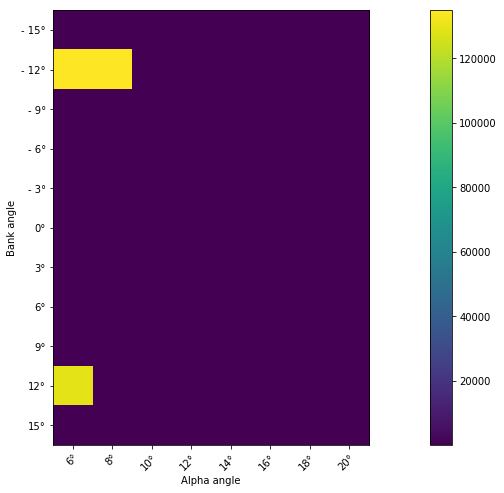

In [15]:
fig, ax = plt.subplots(figsize=(22,8))
    
im = ax.imshow(tensor)

ax.set_yticks(np.arange(n_banks))
ax.set_xticks(np.arange(n_alphas))
ax.set_yticklabels(["- 15°", "- 12°", "- 9°", "- 6°", "- 3°",  "0°", "3°", "6°", "9°", "12°", "15°"])
ax.set_xticklabels(["6°", "8°", "10°", "12°", "14°", "16°", "18°", "20°"])
ax.set_xlabel("Alpha angle")
ax.set_ylabel("Bank angle")

plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

cbar = ax.figure.colorbar(im, ax=ax)

plt.savefig(plot_dir+'occupation.png')
plt.show()

In [194]:
s_traj, s_head = ut.read_traj(data_dir + 'ev_states.txt')

In [195]:
print(s_traj[0][2])

25.7982


In [196]:
return_s_traj, head = ut.read_traj(data_dir+'return_traj.txt')
return_i_steps = np.array(return_s_traj[:,1], dtype=int)

In [197]:
s = -1
for i in range(len(return_i_steps)):
    s = s+return_i_steps[i]
    for j in range(int(return_i_steps[i])):
        s_traj[s-j, 0] -= s_traj[s+1-return_i_steps[i], 0]
        s_traj[s-j, 1] -= s_traj[s+1-return_i_steps[i], 1]  

In [198]:
print(s_traj[4802][1])

0.0


In [199]:
#xs = np.linspace(0, params['n_steps']*env_params['decision_time'], int(params['n_steps'])+1)
xs = np.linspace(0, (len(s_traj)-1)*env_params['decision_time'], len(s_traj))

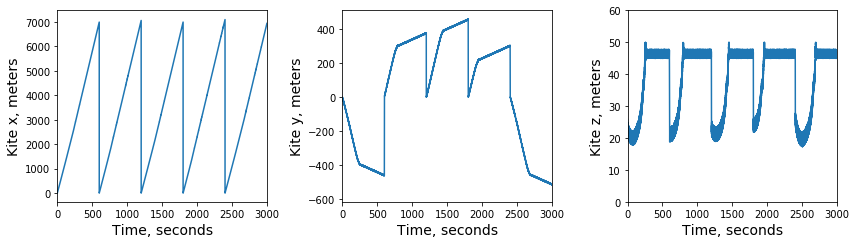

In [200]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(12,3.5))

lim = [0,3000]

ax1.set_xlim(lim)
ax1.set_xlabel('Time, seconds', fontsize=14)
ax1.set_ylabel('Kite x, meters', fontsize=14)
#ax1.set_ylim(0,10000)
ax1.plot(xs, s_traj[:,0])

ax2.set_xlim(lim)
#ax2.set_ylim(-500,500)
ax2.set_xlabel('Time, seconds', fontsize=14)
ax2.set_ylabel('Kite y, meters', fontsize=14)
ax2.plot(xs, s_traj[:,1])

ax3.set_xlim(lim)
ax3.set_ylim(0,60)
ax3.set_xlabel('Time, seconds', fontsize=14)
ax3.set_ylabel('Kite z, meters', fontsize=14)
ax3.plot(xs, s_traj[:,2])

plt.tight_layout()
plt.savefig(plot_dir+"eval_traj_ind.png", dpi=200)
plt.show()

In [201]:
print(s_traj[2401][1])

0.0


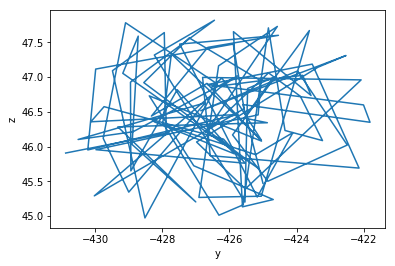

In [202]:
y = []
z = []
for i in range(1600,1700):
    y.append(s_traj[i][1])
    z.append(s_traj[i][2])
plt.plot(y,z)
plt.xlabel("y")
plt.ylabel("z")
plt.show()

In [203]:
aggr_s_traj, labels = ut.read_traj(data_dir+'ev_aggr_st.txt')
aggr_s_i_traj = np.array(aggr_s_traj[:,0], dtype=int)

In [204]:
beta_list = []
if system_name != "kite3d":
    for i in range(len(env_params['beta_bins'])-1):
        beta_list.append((env_params['beta_bins'][i] + env_params['beta_bins'][i+1])/2.0)
else:
    beta_list.append(0)
    env_params['beta_bins'] = np.linspace(-np.pi/2, np.pi/2, 2)
    #env_params['beta_bins'].append(-np.pi/2)
    #env_params['beta_bins'].append(np.pi/2)

In [205]:
def aggr_state_index_translator(index, n_betas, n_banks):
    beta = index % n_betas
    rest = index // n_betas
    bank = rest % n_banks
    alpha = rest // n_banks
    return beta, bank, alpha

In [206]:
beta_i, bank_i, alpha_i = aggr_state_index_translator(aggr_s_i_traj, len(env_params['beta_bins'])-1, len(env_params['banks']))
alphas = np.take(env_params['alphas'], alpha_i)
banks = np.rad2deg(np.take(env_params['banks'], bank_i))
betas = np.rad2deg(np.take(beta_list, beta_i))

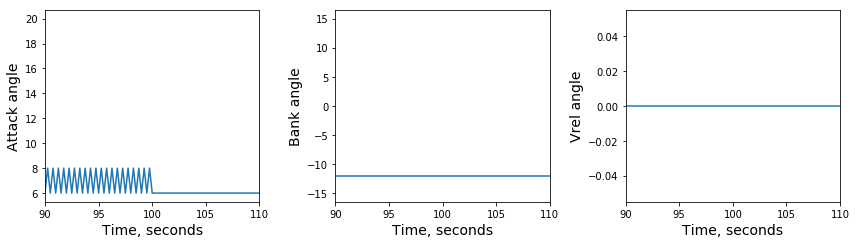

In [208]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(12,3.5))
x_wind = [90,110]

ax1.set_xlabel('Time, seconds', fontsize=14)
ax1.set_ylabel('Attack angle', fontsize=14)
ax1.set_xlim(x_wind)
ax1.plot(xs, alphas)

ax2.set_xlabel('Time, seconds', fontsize=14)
ax2.set_ylabel('Bank angle', fontsize=14)
ax2.set_xlim(x_wind)
ax2.plot(xs, banks)

ax3.set_xlabel('Time, seconds', fontsize=14)
ax3.set_ylabel('Vrel angle', fontsize=14)
ax3.set_xlim(x_wind)
ax3.plot(xs, betas)

plt.tight_layout()
plt.savefig(plot_dir+"eval_pol_ind.png", dpi=200)
plt.show()

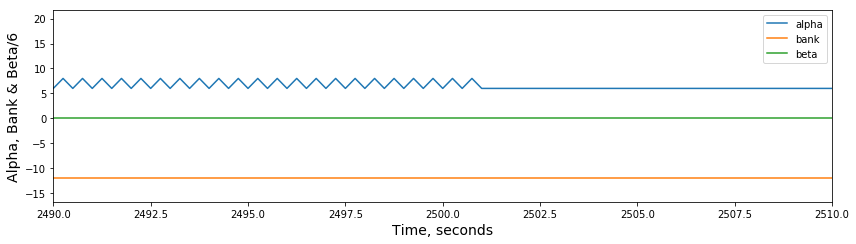

In [213]:
fig, ax = plt.subplots(figsize = (12,3.5))

x_wind = [2490,2510]

ax.set_xlabel('Time, seconds', fontsize=14)
ax.set_ylabel('Alpha, Bank & Beta/6', fontsize=14)
ax.set_xlim(x_wind)
ax.plot(xs, alphas, label="alpha")
ax.plot(xs, banks, label="bank")
ax.plot(xs, betas/6, label="beta")

plt.legend()
plt.tight_layout()
plt.show()

In [41]:
print(np.where(env_params['banks'] == np.deg2rad(15.)))

(array([], dtype=int64),)


In [43]:
print(env_params['beta_bins'])

[-1.57079633 -1.22173048 -0.87266463 -0.52359878 -0.17453293  0.17453293
  0.52359878  0.87266463  1.22173048  1.57079633]


In [47]:
n_betas = len(env_params['beta_bins']-1)
n_banks = len(env_params['banks'])
n_occ = np.zeros(n_banks*len(env_params['beta_bins'])-1)

for t in range(4800):
    n_occ[n_betas*(int((np.deg2rad(banks[t])+np.max(env_params['banks']))/(env_params['banks'][1]-env_params['banks'][0])))
          +int((betas[t]+80)/20)]+=1
    
    

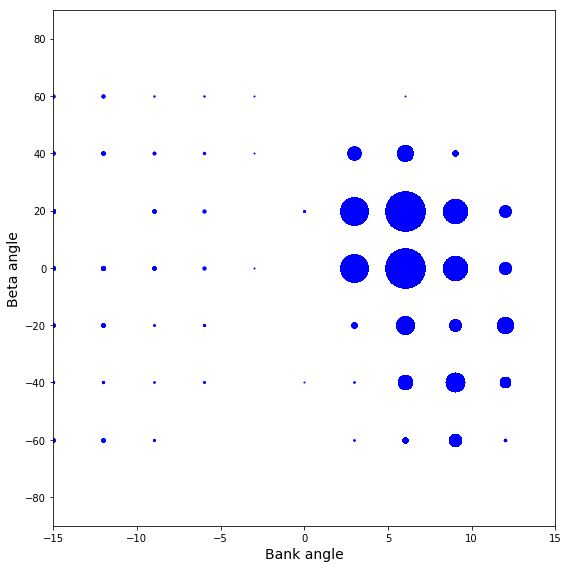

In [52]:
fig, ax = plt.subplots(figsize = (8,8))

x_lim = [-15,15]
y_lim = [-90, 90]

ax.set_xlabel('Bank angle', fontsize=14)
ax.set_ylabel('Beta angle', fontsize=14)
ax.set_xlim(x_lim)
ax.set_ylim(y_lim)

for t in range(4800):
    ax.scatter(banks[t], betas[t], s = n_occ[n_betas*(int((np.deg2rad(banks[t])+np.max(env_params['banks']))/(env_params['banks'][1]-env_params['banks'][0])))
          +int((betas[t]+80)/20)], c = "b")

plt.tight_layout()
plt.show()


In [97]:
ba = []
be = []
a = []
count = 0
for t in range(0,15000):
    if t%10 == 0 and t%600 > 100:
        count += 1
        a.append(alphas[t])
        ba.append(banks[t])
        be.append(betas[t])
ba = np.array(ba)
be = np.array(be)
a = np.array(a)
avg_alpha = np.sum(a)/count
avg_bank = np.sum(ba)/count
avg_beta = np.sum(be)/count
s_a = np.sqrt(np.sum((a-avg_alpha)**2)/(count-1))
s_ba = np.sqrt(np.sum((ba-avg_bank)**2)/(count-1))
s_be = np.sqrt(np.sum((be-avg_beta)**2)/(count-1))
corr_ba_be = np.sum(((ba-avg_bank)/s_ba)*((be-avg_beta)/s_be))/(count-1)
corr_a_be = np.sum(((a-avg_alpha)/s_a)*((be-avg_beta)/s_be))/(count-1)
print(corr_ba_be)
print(corr_a_be)

-0.416813381045
-0.0572777822838


In [120]:
def bins_from_list(l):
    bins = np.array([(l[i] + l[i+1])/2 for i in range(len(l)-1)])
    bins = np.append(2*l[0] - bins[0], bins)
    bins = np.append(bins, 2*l[-1] - bins[-1])
    return bins

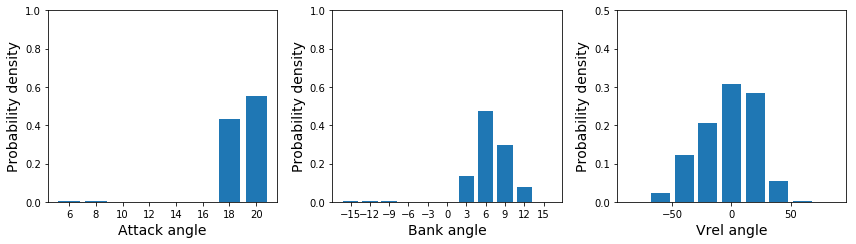

In [121]:
if system_name != "kite3d":
    fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(12,3.5))
else:
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,3.5))

ax1.set_ylabel('Probability density', fontsize=14)
ax1.set_xlabel('Attack angle', fontsize=14)
ax1.set_ylim([0,1.0])
bins = bins_from_list(env_params['alphas'])
ax1.set_xticks(env_params['alphas'])
x, y, p  = ax1.hist(alphas, bins=bins, align='mid', rwidth=0.8, density=True)
#print(x,y,p)
for item in p:
    item.set_height(item.get_height()/sum(x))

ax2.set_ylabel('Probability density', fontsize=14)
ax2.set_xlabel('Bank angle', fontsize=14)
ax2.set_ylim([0,1.0])
bins = bins_from_list(np.rad2deg(env_params['banks']))
ax2.set_xticks(np.rad2deg(env_params['banks']))
x2, y2, p2 = ax2.hist(banks, bins=bins, align='mid', rwidth=0.8, density=True)
#print(x2,y2,p2)
for item in p2:
    item.set_height(item.get_height()/sum(x2))


if system_name != "kite3d":
    ax3.set_ylabel('Probability density', fontsize=14)
    ax3.set_xlabel('Vrel angle', fontsize=14)
    ax3.set_ylim([0,0.5])
    bins = bins_from_list(np.rad2deg(beta_list))
    #ax2.set_xticks(env_params['banks'])
    x3, y3, p3 = ax3.hist(betas, bins=bins, align='mid', rwidth=0.8, density=True)
    for item in p3:
        item.set_height(item.get_height()/sum(x3))


plt.tight_layout()
plt.savefig(plot_dir+"aggr_states_ind.png", dpi=200)
plt.show()

In [122]:
return_s_traj, head = ut.read_traj(data_dir+'return_traj.txt')
return_i_steps = np.array(return_s_traj[:,1], dtype=int)

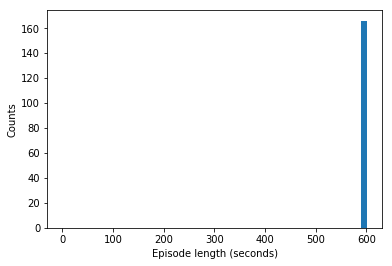

In [123]:
g=plt.hist(return_i_steps/4, bins = 50, range = (0,601), density = False, stacked = True)
plt.xlabel('Episode length (seconds)')
plt.ylabel('Counts')
#plt.lim(0,1000)
plt.savefig(plot_dir+"hist_endtimes.png", dpi=200)
plt.show()

In [36]:
print(g)

(array([   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,  166.]), array([   0.  ,   12.02,   24.04,   36.06,   48.08,   60.1 ,   72.12,
         84.14,   96.16,  108.18,  120.2 ,  132.22,  144.24,  156.26,
        168.28,  180.3 ,  192.32,  204.34,  216.36,  228.38,  240.4 ,
        252.42,  264.44,  276.46,  288.48,  300.5 ,  312.52,  324.54,
        336.56,  348.58,  360.6 ,  372.62,  384.64,  396.66,  408.68,
        420.7 ,  432.72,  444.74,  456.76,  468.78,  480.8 ,  492.82,
        504.84,  516.86,  528.88,  540.9 ,  552.92,  564.94,  576.96,
        588.98,  601.  ]), <a list of 50 Patch objects>)


In [37]:
print(12.02*g[0])
for i in range(50):
    g[0][i]=12.02*g[0][i]

[    0.       0.       0.       0.       0.       0.       0.       0.
     0.       0.       0.       0.       0.       0.       0.       0.
     0.       0.       0.       0.       0.       0.       0.       0.
     0.       0.       0.       0.       0.       0.       0.       0.
     0.       0.       0.       0.       0.       0.       0.       0.
     0.       0.       0.       0.       0.       0.       0.       0.
     0.    1995.32]


In [38]:
integ = 0
tot = 0
for i in range(49):
    integ += g[0][i]
print(integ)

for i in range(50):
    tot += g[0][i]
print(tot*12.02)
print(integ/tot)

0.0
23983.7464
0.0


In [39]:
print(s_traj[return_i_steps[0]-1,0]-s_traj[0,0])
print(s_traj[return_i_steps[0]-1,0])
print(s_traj[0,0])

7116.661
7116.661
0.0


In [40]:
distances = np.zeros(len(return_i_steps))
s = -1
for i in range(len(return_i_steps)):
    s += return_i_steps[i]
    #print(s_traj[s,0], s_traj[s+1,0])
    distances[i] = s_traj[s,0]

In [41]:
distances_norm = np.zeros(len(return_i_steps))
s = -1
for i in range(len(return_i_steps)):
    s = s+return_i_steps[i]
    distances_norm[i] = s_traj[s,0] - s_traj[s+1-return_i_steps[i],0]
    

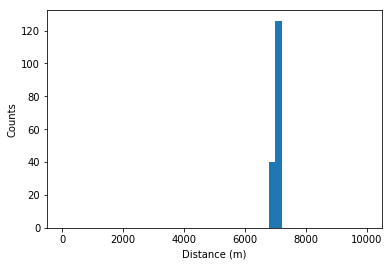

In [42]:
h=plt.hist(distances_norm, bins = 50, range = (0, 10000), density = False)
plt.xlabel('Distance (m)')
plt.ylabel('Counts')
#plt.xlim(0,10000)
plt.savefig(plot_dir+"hist_enddistnorm.png", dpi=200)
plt.show()

In [23]:
print(h)

(array([   0.,    5.,    8.,   20.,   60.,   43.,   38.,   31.,   53.,
         56.,   48.,   45.,   45.,   34.,   18.,   23.,   25.,   36.,
         37.,   34.,   35.,   19.,   46.,   68.,  111.,  124.,  145.,
        135.,  118.,  116.,  111.,  132.,  214.,  115.,   30.,    4.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.]), array([     0.,    200.,    400.,    600.,    800.,   1000.,   1200.,
         1400.,   1600.,   1800.,   2000.,   2200.,   2400.,   2600.,
         2800.,   3000.,   3200.,   3400.,   3600.,   3800.,   4000.,
         4200.,   4400.,   4600.,   4800.,   5000.,   5200.,   5400.,
         5600.,   5800.,   6000.,   6200.,   6400.,   6600.,   6800.,
         7000.,   7200.,   7400.,   7600.,   7800.,   8000.,   8200.,
         8400.,   8600.,   8800.,   9000.,   9200.,   9400.,   9600.,
         9800.,  10000.]), <a list of 50 Patch objects>)


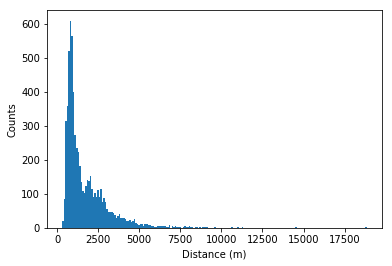

In [37]:
k=plt.hist(distances, bins = 200, density = False)
plt.xlabel('Distance (m)')
plt.ylabel('Counts')
#plt.xlim(0,10000)
plt.savefig(plot_dir+"hist_enddist.png", dpi=200)
plt.show()

In [38]:
print(k)

(array([  21.,   85.,  315.,  360.,  520.,  610.,  566.,  401.,  272.,
        234.,  222.,  182.,  135.,  108.,  103.,  122.,  140.,  137.,
        154.,  114.,   90.,  103.,   92.,  111.,   92.,  115.,   77.,
         87.,   77.,   56.,   48.,   48.,   48.,   44.,   38.,   29.,
         34.,   42.,   30.,   28.,   29.,   27.,   19.,   21.,   22.,
         18.,   21.,   25.,   15.,   10.,    9.,   10.,   11.,    6.,
         10.,   10.,    9.,    7.,    6.,    5.,    3.,    3.,    5.,
          6.,    4.,    6.,    6.,    4.,    2.,    3.,    7.,    0.,
          5.,    2.,    5.,    2.,    3.,    3.,    0.,    2.,    4.,
          2.,    3.,    6.,    1.,    1.,    0.,    3.,    3.,    0.,
          1.,    0.,    1.,    1.,    1.,    2.,    0.,    0.,    0.,
          0.,    2.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    1.,    0.,    0.,    0.,    1.,    0.,
          0.,    1.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.

In [25]:
distances_stop = []
s = -1
for i in range(len(return_i_steps)):
    s+=return_i_steps[i]
    #print(s_traj[s,0], s_traj[s-10,0])
    if abs(s_traj[s,0] - s_traj[s-10, 0]) < 5:
        #distances_stop.append(s_traj[s,0]-s_traj[s-return_i_steps[i]+1,0])
        distances_stop.append(s_traj[s,0])

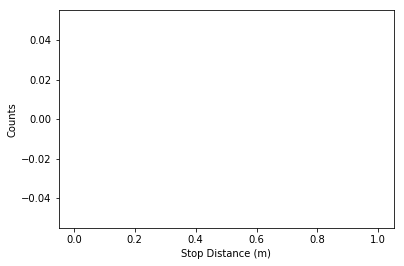

In [26]:
plt.hist(distances_stop, bins = 50, density = False)
plt.xlabel('Stop Distance (m)')
plt.ylabel('Counts')
#plt.xlim(0,2500)
plt.savefig(plot_dir+"hist_enddist_stop.png", dpi=200)
plt.show()

In [71]:
np.argmax(h[0])

85

In [72]:
h[0][85]

408.0

In [76]:
h[1][84]

591.03389439999989

In [77]:
h[1][86]

602.99132759999986